In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import itertools
sns.set_style("whitegrid")
%matplotlib inline

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Part 1

In [3]:
cars = pd.read_csv("car_data.csv")

In [7]:
mvp = cars[['Mileage', 'Price']]

In [8]:
mvp.head()

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324


In [16]:
regr = linear_model.LinearRegression()
reshape_milage = mvp["Mileage"].values.reshape((-1,1))
regr.fit(reshape_milage, mvp["Price"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
def plot_regression(fn):
    plt.scatter(cars["Mileage"], cars["Price"])
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    plt.ylim(ymax=80000, ymin=0)
    plt.plot(xs, [fn(x) for x in xs])

y = [-0.1725205]x + 24764.55900606168


/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


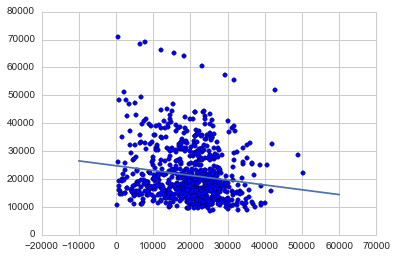

In [26]:
fn = lambda x: regr.predict(x)[0]
plot_regression(fn)
print("y = {}x + {}".format(regr.coef_, regr.intercept_))

In [27]:
regr.score(reshape_milage, mvp["Price"])

0.020463447323489481

# Part 2

In [39]:
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [47]:
cars2 = cars[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
input_data = cars2[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = cars2["Price"]

In [48]:
regress = linear_model.LinearRegression()
fit = regress.fit(input_data, price)

In [49]:
print(regress.score(input_data, price))
print("Coefecient: ", regress.coef_)
print("Y-intercept: ", regress.intercept_)

0.446264353673
Coefecient:  [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Y-intercept:  6758.7551436


In [50]:
dependent_vars = list(cars2.columns)
dependent_vars.remove("Price")
combos = list(itertools.combinations(dependent_vars, 2))

choices = []

def regression_for(combos):
    combo = list(combos)
    df = cars2.loc[:, combo + ['Price']]
    df.dropna(inplace = True)
    input_data = df[combo]
    price = cars2['Price']
    regres = linear_model.LinearRegression()
    regres.fit(input_data, price)
    return regres, regres.score(input_data, price)

for combo in combos:
    rgr, score = regression_for(combo)
    choices.append((combo, score))

best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Cylinder', 'Cruise'), 0.38394913240273443)
[ 3392.58658184  6000.36575223] -1046.43091026
